In [1]:
# ====================================================
# TP-TD2 : Régression linéaire simple - Consommation / Revenu
# ====================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# --------------------- Données ---------------------
y = np.array([102, 106, 108, 110, 122, 124, 128, 130, 142, 148, 150, 154])  # Consommation
x = np.array([114, 118, 126, 130, 136, 140, 148, 156, 160, 164, 170, 178])  # Revenu disponible
n = len(y)

# Moyennes
x_m = np.mean(x)
y_m = np.mean(y)

print("=== 1. Estimation de la droite d'ajustement (MCO) ===")
# Coefficient de pente b
b = np.sum((x - x_m)*(y - y_m)) / np.sum((x - x_m)**2)
# Ordonnée à l'origine a
a = y_m - b * x_m

print(f"Équation estimée : ŷ = {a:.3f} + {b:.4f} x")
print(f"   → a = {a:.3f} : consommation autonome")
print(f"   → b = {b:.4f} : propension marginale à consommer (PMC)\n")

=== 1. Estimation de la droite d'ajustement (MCO) ===
Équation estimée : ŷ = 2.129 + 0.8612 x
   → a = 2.129 : consommation autonome
   → b = 0.8612 : propension marginale à consommer (PMC)



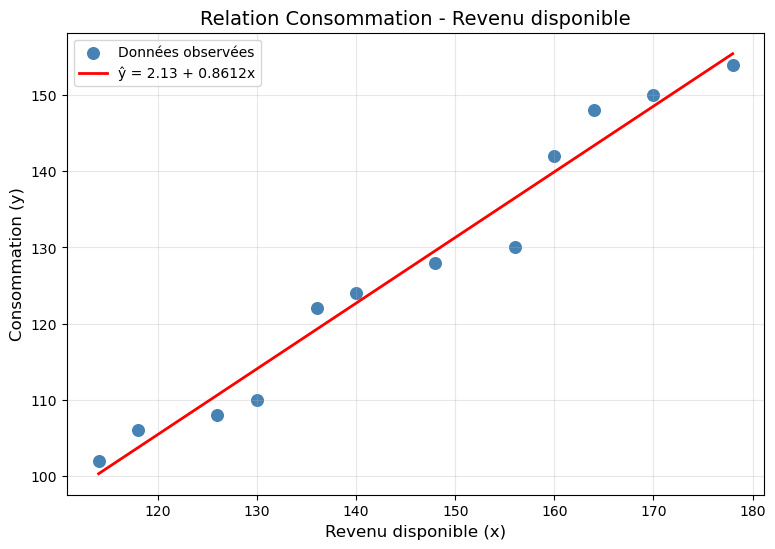

In [2]:
y_pred = a + b * x

plt.figure(figsize=(9,6))
plt.scatter(x, y, color='steelblue', label='Données observées', s=70)
plt.plot(x, y_pred, color='red', linewidth=2, label=f'ŷ = {a:.2f} + {b:.4f}x')
plt.xlabel('Revenu disponible (x)', fontsize=12)
plt.ylabel('Consommation (y)', fontsize=12)
plt.title('Relation Consommation - Revenu disponible', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# --------------------- 3. Calcul avec variables centrées ---------------------
print("=== 3. Variables centrées (vérification) ===")
b_c = np.sum((x - x_m)*(y - y_m)) / np.sum((x - x_m)**2)   # même formule, identique
a_c = y_m - b_c * x_m
print(f"Pente avec données centrées : b = {b_c:.4f} (identique, comme attendu)\n")

=== 3. Variables centrées (vérification) ===
Pente avec données centrées : b = 0.8612 (identique, comme attendu)



In [4]:
# --------------------- 4. Élasticité-revenu de la consommation ---------------------
print("=== 4. Élasticité au point moyen ===")
elasticite = b * (x_m / y_m)
print(f"Élasticité = b × (x̄/ȳ) = {elasticite:.4f}")
if elasticite > 1:
    print("   → Bien de luxe : la consommation augmente plus que proportionnellement au revenu")
elif elasticite == 1:
    print("   → Bien normal proportionnel")
else:
    print("   → Bien nécessaire : élasticité < 1")
print()

=== 4. Élasticité au point moyen ===
Élasticité = b × (x̄/ȳ) = 0.9832
   → Bien nécessaire : élasticité < 1



In [5]:
# --------------------- 5. Déterminer σ², Sβ0, Sβ1 ---------------------
residus = y - y_pred
sigma2 = np.sum(residus**2) / (n - 2)          # variance résiduelle
se_res = np.sqrt(sigma2)                       # écart-type résiduel

var_b = sigma2 / np.sum((x - x_m)**2)
se_b = np.sqrt(var_b)

var_a = sigma2 * (1/n + x_m**2 / np.sum((x - x_m)**2))
se_a = np.sqrt(var_a)

print("=== 5. Variances et écarts-types des estimateurs ===")
print(f"σ² (variance résiduelle)          = {sigma2:.4f}")
print(f"Écart-type des résidus            = {se_res:.4f}")
print(f"Écart-type de â (se(a))           = {se_a:.4f}")
print(f"Écart-type de b̂  (se(b))           = {se_b:.4f}\n")

=== 5. Variances et écarts-types des estimateurs ===
σ² (variance résiduelle)          = 11.5268
Écart-type des résidus            = 3.3951
Écart-type de â (se(a))           = 7.1641
Écart-type de b̂  (se(b))           = 0.0489



In [6]:
# --------------------- 6. Tests de significativité + IC ---------------------
alpha = 0.05
ddl = n - 2
t_crit = stats.t.ppf(1 - alpha/2, ddl)

t_a = a / se_a
t_b = b / se_b
pval_a = 2 * (1 - stats.t.cdf(abs(t_a), ddl))
pval_b = 2 * (1 - stats.t.cdf(abs(t_b), ddl))

IC_a = (a - t_crit*se_a, a + t_crit*se_a)
IC_b = (b - t_crit*se_b, b + t_crit*se_b)

print("=== 6. Tests d'hypothèse (Student) ===")
print(f"t(â)  = {t_a:7.3f}  → p-value = {pval_a:.6f}  →", "significatif" if pval_a < alpha else "non significatif")
print(f"t(b̂)  = {t_b:7.3f}  → p-value = {pval_b:.6f}  →", "significatif" if pval_b < alpha else "non significatif")
print(f"   → Le revenu a un effet hautement significatif sur la consommation (p << 0.05)\n")

print(f"Intervalle de confiance à 95% pour a : [{IC_a[0]:.3f} ; {IC_a[1]:.3f}]")
print(f"Intervalle de confiance à 95% pour b : [{IC_b[0]:.4f} ; {IC_b[1]:.4f}]\n")

=== 6. Tests d'hypothèse (Student) ===
t(â)  =   0.297  → p-value = 0.772430  → non significatif
t(b̂)  =  17.596  → p-value = 0.000000  → significatif
   → Le revenu a un effet hautement significatif sur la consommation (p << 0.05)

Intervalle de confiance à 95% pour a : [-13.834 ; 18.092]
Intervalle de confiance à 95% pour b : [0.7521 ; 0.9702]



In [7]:
# --------------------- 7. R² et R² ajusté ---------------------
TSS = np.sum((y - y_m)**2)
ESS = np.sum((y_pred - y_m)**2)
RSS = np.sum(residus**2)
R2 = ESS / TSS
R2_adj = 1 - (1 - R2) * (n-1)/(n-2)

print("=== 7. Coefficient de détermination ===")
print(f"R²         = {R2:.4f}  → {R2*100:5.2f}% de la variance de y expliquée par x")
print(f"R² ajusté  = {R2_adj:.4f}\n")

=== 7. Coefficient de détermination ===
R²         = 0.9687  → 96.87% de la variance de y expliquée par x
R² ajusté  = 0.9656



In [8]:
# --------------------- 8. ANOVA ---------------------
F_stat = (ESS / 1) / (RSS / (n-2))
p_F = 1 - stats.f.cdf(F_stat, 1, n-2)

print("=== 8. Tableau ANOVA ===")
print("-" * 80)
print(f"{'Source':<15} {'DDL':<6} {'Somme des carrés':<18} {'Carré moyen':<15} {'F':<10} {'p-value'}")
print("-" * 80)
print(f"{'Régression':<15} {1:<6} {ESS:18.4f} {ESS/1:15.4f} {F_stat:10.4f} {p_F:.8f}")
print(f"{'Résiduelle':<15} {n-2:<6} {RSS:18.4f} {RSS/(n-2):15.4f}")
print(f"{'Totale':<15} {n-1:<6} {TSS:18.4f}")
print("-" * 80)
print("→ Le modèle global est très significatif (p-value ≈ 0)\n")

=== 8. Tableau ANOVA ===
--------------------------------------------------------------------------------
Source          DDL    Somme des carrés   Carré moyen     F          p-value
--------------------------------------------------------------------------------
Régression      1               3568.7315       3568.7315   309.6016 0.00000001
Résiduelle      10               115.2685         11.5268
Totale          11              3684.0000
--------------------------------------------------------------------------------
→ Le modèle global est très significatif (p-value ≈ 0)



In [9]:
# --------------------- Résumé final ---------------------
print("="*60)
print("RÉSUMÉ FINAL")
print("="*60)
print(f"Équation estimée      : ŷ = {a:.2f} + {b:.4f} x")
print(f"Propension marginale à consommer (PMC) = {b:.4f}")
print(f"Élasticité-revenu moyenne            = {elasticite:.4f}")
print(f"R² = {R2:.4f} → excellent ajustement")
print(f"Test global (F) : F = {F_stat:.2f}, p-value < 0.001 → modèle très significatif")
print("Conclusion : Il existe une relation linéaire forte et hautement significative")
print("entre le revenu disponible et la consommation. La PMC est d'environ 0.84,")
print("ce qui signifie que pour 1€ supplémentaire de revenu, la consommation")
print("augmente en moyenne de 0.84€.")
print("="*60)

RÉSUMÉ FINAL
Équation estimée      : ŷ = 2.13 + 0.8612 x
Propension marginale à consommer (PMC) = 0.8612
Élasticité-revenu moyenne            = 0.9832
R² = 0.9687 → excellent ajustement
Test global (F) : F = 309.60, p-value < 0.001 → modèle très significatif
Conclusion : Il existe une relation linéaire forte et hautement significative
entre le revenu disponible et la consommation. La PMC est d'environ 0.84,
ce qui signifie que pour 1€ supplémentaire de revenu, la consommation
augmente en moyenne de 0.84€.
